In [ ]:
import pandas as pd
import numpy as np

Reading CSV

In [ ]:
from google.colab import files
uploaded = files.upload()  # This will prompt you to upload the file
import pandas as pd
data = pd.read_csv("netflix.csv")

Saving netflix.csv to netflix.csv


In [ ]:
df=pd.read_csv('netflix.csv')

In [ ]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [ ]:
df.shape

(8807, 12)

In [ ]:
df.isna().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [ ]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
8802,False
8803,False
8804,False
8805,False


In [ ]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [ ]:
df.describe(include=object)

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s8807,Movie,Zubaan,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4


Structuring of data


In [ ]:
df['date_added'] = pd.to_datetime(df['date_added'],format='mixed')
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


Data cleaning (remove duplicates, irrelevant info, handle missing data, handle outliers)


In [ ]:
df=df.drop_duplicates()
df.duplicated().sum()

np.int64(0)

In [ ]:
df=df.drop(columns=['show_id'])
df.head(2)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [ ]:
df['director']=df['director'].fillna('not given')
df['cast']=df['cast'].fillna('not given')
df['country']=df['country'].fillna('not given')
df.head(5)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,not given,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,TV Show,Blood & Water,not given,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",not given,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,TV Show,Jailbirds New Orleans,not given,not given,not given,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,TV Show,Kota Factory,not given,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


Univariate analysis

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df['type'].value_counts()

,count
type,
Movie,6131
TV Show,2676


<ipython-input-26-7d72752a8633>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type',data=df,palette='pastel')


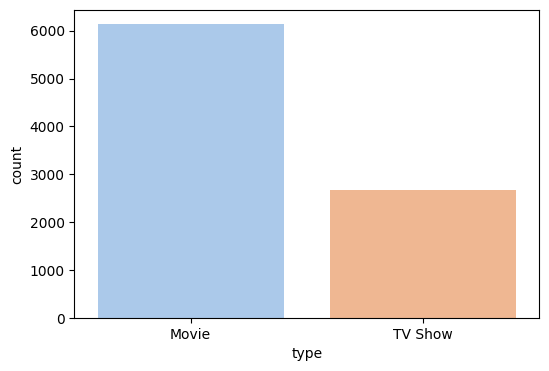

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='type',data=df,palette='pastel')
plt.show()

<ipython-input-27-70ba040d344b>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,y='rating',palette='pastel')


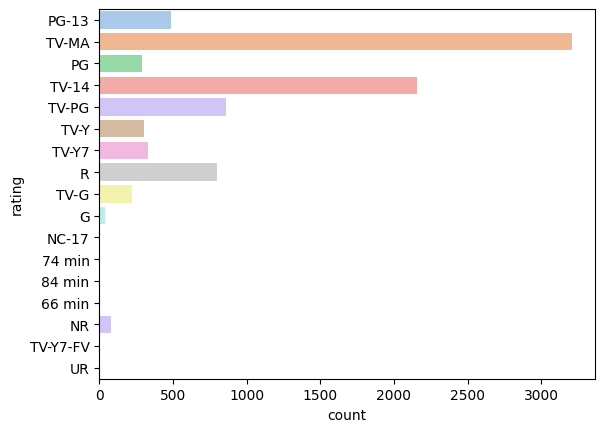

In [ ]:
sns.countplot(data=df,y='rating',palette='pastel')
plt.show()

In [ ]:
df['rating'].value_counts()

,count
rating,
TV-MA,3207
TV-14,2160
TV-PG,863
R,799
PG-13,490
TV-Y7,334
TV-Y,307
PG,287
TV-G,220


In [ ]:
df['release_year'].value_counts().sort_index()

,count
release_year,
1925,1
1942,2
1943,3
1944,3
1945,4
...,...
2017,1032
2018,1147
2019,1030


Bivariate or multivariate analysis

In [ ]:
top_countries=df['country'].value_counts().head(10)
top_countries

,count
country,
United States,2818
India,972
not given,831
United Kingdom,419
Japan,245
South Korea,199
Canada,181
Spain,145
France,124


In [ ]:
top_countries = df['country'].value_counts().nlargest(10).index
top_countries

Index(['United States', 'India', 'not given', 'United Kingdom', 'Japan',
       'South Korea', 'Canada', 'Spain', 'France', 'Mexico'],
      dtype='object', name='country')